In [ ]:
path  = '/content/drive/MyDrive/soils'

Used resnet pretrained model to extract features of images now we can use knn to find similarity in the extracted features of test image then if the top similar one image is in range of loamy soils images then we say the soil is good for cotton

In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

#print(model.summary())

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

# Change the path to your image folder in Google Drive
image_folder_path = '/content/drive/MyDrive/soils'

# Get the list of file names in the image folder
filenames = []

for file in os.listdir(image_folder_path):
    filenames.append(os.path.join(image_folder_path, file))

feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file, model))

# Save the feature embeddings and file names using pickle
pickle.dump(feature_list, open('embeddings.pkl', 'wb'))
pickle.dump(filenames, open('filenames.pkl', 'wb'))


94765736/94765736 [==============================] - 1s 0us/step


  0%|          | 0/144 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  1%|          | 1/144 [00:01<04:30,  1.89s/it]

1/1 [==============================] - 0s 336ms/step


  1%|▏         | 2/144 [00:03<04:15,  1.80s/it]

1/1 [==============================] - 0s 202ms/step


  2%|▏         | 3/144 [00:03<02:36,  1.11s/it]

1/1 [==============================] - 0s 189ms/step


  3%|▎         | 4/144 [00:04<01:49,  1.28it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 5/144 [00:04<01:22,  1.69it/s]

1/1 [==============================] - 0s 234ms/step


  4%|▍         | 6/144 [00:04<01:12,  1.91it/s]

1/1 [==============================] - 0s 339ms/step


  5%|▍         | 7/144 [00:05<01:21,  1.67it/s]

1/1 [==============================] - 0s 335ms/step


  6%|▌         | 8/144 [00:06<01:14,  1.83it/s]

1/1 [==============================] - 0s 349ms/step


  6%|▋         | 9/144 [00:06<01:10,  1.92it/s]

1/1 [==============================] - 0s 328ms/step


  7%|▋         | 10/144 [00:06<01:05,  2.04it/s]

1/1 [==============================] - 0s 330ms/step


  8%|▊         | 11/144 [00:07<01:04,  2.05it/s]

1/1 [==============================] - 0s 334ms/step


  8%|▊         | 12/144 [00:07<01:03,  2.09it/s]

1/1 [==============================] - 0s 339ms/step


  9%|▉         | 13/144 [00:08<01:01,  2.12it/s]

1/1 [==============================] - 0s 341ms/step


 10%|▉         | 14/144 [00:08<01:00,  2.16it/s]

1/1 [==============================] - 0s 314ms/step


 10%|█         | 15/144 [00:09<00:58,  2.21it/s]

1/1 [==============================] - 0s 291ms/step


 11%|█         | 16/144 [00:09<00:57,  2.22it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█▏        | 17/144 [00:09<00:50,  2.51it/s]

1/1 [==============================] - 0s 195ms/step


 12%|█▎        | 18/144 [00:10<00:45,  2.75it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█▎        | 19/144 [00:10<00:42,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 14%|█▍        | 20/144 [00:10<00:43,  2.83it/s]

1/1 [==============================] - 0s 193ms/step


 15%|█▍        | 21/144 [00:11<00:40,  3.04it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▌        | 22/144 [00:11<00:38,  3.16it/s]

1/1 [==============================] - 0s 195ms/step


 16%|█▌        | 23/144 [00:11<00:36,  3.31it/s]

1/1 [==============================] - 0s 187ms/step


 17%|█▋        | 24/144 [00:11<00:34,  3.43it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 25/144 [00:12<00:34,  3.43it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 26/144 [00:12<00:35,  3.36it/s]

1/1 [==============================] - 0s 191ms/step


 19%|█▉        | 27/144 [00:12<00:33,  3.46it/s]

1/1 [==============================] - 0s 195ms/step


 19%|█▉        | 28/144 [00:13<00:33,  3.51it/s]

1/1 [==============================] - 0s 199ms/step


 20%|██        | 29/144 [00:13<00:36,  3.16it/s]

1/1 [==============================] - 0s 191ms/step


 21%|██        | 30/144 [00:13<00:34,  3.31it/s]

1/1 [==============================] - 0s 185ms/step


 22%|██▏       | 31/144 [00:14<00:32,  3.47it/s]

1/1 [==============================] - 0s 191ms/step


 22%|██▏       | 32/144 [00:14<00:32,  3.49it/s]

1/1 [==============================] - 0s 202ms/step


 23%|██▎       | 33/144 [00:14<00:31,  3.55it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▎       | 34/144 [00:14<00:30,  3.55it/s]

1/1 [==============================] - 0s 194ms/step


 24%|██▍       | 35/144 [00:15<00:30,  3.59it/s]

1/1 [==============================] - 0s 198ms/step


 25%|██▌       | 36/144 [00:15<00:34,  3.15it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▌       | 37/144 [00:15<00:35,  3.04it/s]

1/1 [==============================] - 0s 192ms/step


 26%|██▋       | 38/144 [00:16<00:32,  3.24it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 39/144 [00:16<00:30,  3.40it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 40/144 [00:16<00:29,  3.47it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 41/144 [00:16<00:28,  3.56it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██▉       | 42/144 [00:17<00:28,  3.61it/s]

1/1 [==============================] - 0s 207ms/step


 30%|██▉       | 43/144 [00:17<00:27,  3.63it/s]

1/1 [==============================] - 0s 194ms/step


 31%|███       | 44/144 [00:17<00:27,  3.65it/s]

1/1 [==============================] - 0s 197ms/step


 31%|███▏      | 45/144 [00:18<00:27,  3.66it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 46/144 [00:18<00:30,  3.26it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 47/144 [00:18<00:28,  3.35it/s]

1/1 [==============================] - 0s 197ms/step


 33%|███▎      | 48/144 [00:18<00:27,  3.46it/s]

1/1 [==============================] - 0s 201ms/step


 34%|███▍      | 49/144 [00:19<00:30,  3.13it/s]

1/1 [==============================] - 0s 254ms/step


 35%|███▍      | 50/144 [00:19<00:30,  3.12it/s]

1/1 [==============================] - 0s 327ms/step


 35%|███▌      | 51/144 [00:20<00:41,  2.23it/s]

1/1 [==============================] - 0s 334ms/step


 36%|███▌      | 52/144 [00:20<00:40,  2.26it/s]

1/1 [==============================] - 0s 325ms/step


 37%|███▋      | 53/144 [00:21<00:40,  2.27it/s]

1/1 [==============================] - 0s 310ms/step


 38%|███▊      | 54/144 [00:21<00:39,  2.29it/s]

1/1 [==============================] - 0s 319ms/step


 38%|███▊      | 55/144 [00:22<00:38,  2.29it/s]

1/1 [==============================] - 0s 316ms/step


 39%|███▉      | 56/144 [00:22<00:38,  2.31it/s]

1/1 [==============================] - 0s 401ms/step


 40%|███▉      | 57/144 [00:23<00:39,  2.19it/s]

1/1 [==============================] - 0s 351ms/step


 40%|████      | 58/144 [00:23<00:39,  2.19it/s]

1/1 [==============================] - 0s 319ms/step


 41%|████      | 59/144 [00:23<00:38,  2.20it/s]

1/1 [==============================] - 0s 323ms/step


 42%|████▏     | 60/144 [00:24<00:37,  2.24it/s]

1/1 [==============================] - 0s 211ms/step


 42%|████▏     | 61/144 [00:24<00:34,  2.43it/s]

1/1 [==============================] - 0s 199ms/step


 43%|████▎     | 62/144 [00:25<00:33,  2.45it/s]

1/1 [==============================] - 0s 196ms/step


 44%|████▍     | 63/144 [00:25<00:29,  2.73it/s]

1/1 [==============================] - 0s 192ms/step


 44%|████▍     | 64/144 [00:25<00:29,  2.68it/s]

1/1 [==============================] - 0s 190ms/step


 45%|████▌     | 65/144 [00:26<00:30,  2.63it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 66/144 [00:26<00:26,  2.89it/s]

1/1 [==============================] - 0s 192ms/step


 47%|████▋     | 67/144 [00:26<00:24,  3.10it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 68/144 [00:27<00:23,  3.22it/s]

1/1 [==============================] - 0s 198ms/step


 48%|████▊     | 69/144 [00:27<00:22,  3.36it/s]

1/1 [==============================] - 0s 202ms/step


 49%|████▊     | 70/144 [00:27<00:21,  3.44it/s]

1/1 [==============================] - 0s 194ms/step


 49%|████▉     | 71/144 [00:27<00:21,  3.43it/s]

1/1 [==============================] - 0s 203ms/step


 50%|█████     | 72/144 [00:28<00:20,  3.47it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 73/144 [00:28<00:22,  3.14it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████▏    | 74/144 [00:28<00:21,  3.28it/s]

1/1 [==============================] - 0s 214ms/step


 52%|█████▏    | 75/144 [00:29<00:20,  3.34it/s]

1/1 [==============================] - 0s 195ms/step


 53%|█████▎    | 76/144 [00:29<00:19,  3.45it/s]

1/1 [==============================] - 0s 195ms/step


 53%|█████▎    | 77/144 [00:29<00:19,  3.52it/s]

1/1 [==============================] - 0s 198ms/step


 54%|█████▍    | 78/144 [00:30<00:20,  3.15it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▍    | 79/144 [00:30<00:22,  2.92it/s]

1/1 [==============================] - 0s 196ms/step


 56%|█████▌    | 80/144 [00:30<00:20,  3.11it/s]

1/1 [==============================] - 0s 204ms/step


 56%|█████▋    | 81/144 [00:31<00:21,  2.92it/s]

1/1 [==============================] - 0s 315ms/step


 57%|█████▋    | 82/144 [00:31<00:22,  2.73it/s]

1/1 [==============================] - 0s 338ms/step


 58%|█████▊    | 83/144 [00:32<00:29,  2.09it/s]

1/1 [==============================] - 0s 345ms/step


 58%|█████▊    | 84/144 [00:32<00:30,  1.97it/s]

1/1 [==============================] - 0s 334ms/step


 59%|█████▉    | 85/144 [00:33<00:28,  2.06it/s]

1/1 [==============================] - 0s 320ms/step


 60%|█████▉    | 86/144 [00:33<00:26,  2.16it/s]

1/1 [==============================] - 0s 324ms/step


 60%|██████    | 87/144 [00:34<00:30,  1.88it/s]

1/1 [==============================] - 0s 334ms/step


 61%|██████    | 88/144 [00:35<00:34,  1.65it/s]

1/1 [==============================] - 0s 390ms/step


 62%|██████▏   | 89/144 [00:35<00:31,  1.73it/s]

1/1 [==============================] - 0s 367ms/step


 62%|██████▎   | 90/144 [00:36<00:30,  1.80it/s]

1/1 [==============================] - 0s 410ms/step


 63%|██████▎   | 91/144 [00:36<00:29,  1.79it/s]

1/1 [==============================] - 0s 395ms/step


 64%|██████▍   | 92/144 [00:37<00:28,  1.80it/s]

1/1 [==============================] - 0s 343ms/step


 65%|██████▍   | 93/144 [00:37<00:27,  1.87it/s]

1/1 [==============================] - 0s 312ms/step


 65%|██████▌   | 94/144 [00:38<00:25,  2.00it/s]

1/1 [==============================] - 0s 319ms/step


 66%|██████▌   | 95/144 [00:38<00:23,  2.08it/s]

1/1 [==============================] - 0s 318ms/step


 67%|██████▋   | 96/144 [00:39<00:22,  2.15it/s]

1/1 [==============================] - 0s 326ms/step


 67%|██████▋   | 97/144 [00:39<00:21,  2.18it/s]

1/1 [==============================] - 0s 339ms/step


 68%|██████▊   | 98/144 [00:40<00:25,  1.84it/s]

1/1 [==============================] - 0s 312ms/step


 69%|██████▉   | 99/144 [00:40<00:22,  1.96it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████▉   | 100/144 [00:40<00:19,  2.26it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 101/144 [00:41<00:16,  2.56it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 102/144 [00:41<00:14,  2.81it/s]

1/1 [==============================] - 0s 198ms/step


 72%|███████▏  | 103/144 [00:41<00:15,  2.70it/s]

1/1 [==============================] - 0s 201ms/step


 72%|███████▏  | 104/144 [00:42<00:13,  2.93it/s]

1/1 [==============================] - 0s 199ms/step


 73%|███████▎  | 105/144 [00:42<00:12,  3.12it/s]

1/1 [==============================] - 0s 212ms/step


 74%|███████▎  | 106/144 [00:42<00:11,  3.21it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▍  | 107/144 [00:42<00:11,  3.31it/s]

1/1 [==============================] - 0s 200ms/step


 75%|███████▌  | 108/144 [00:43<00:10,  3.39it/s]

1/1 [==============================] - 0s 193ms/step


 76%|███████▌  | 109/144 [00:43<00:11,  3.07it/s]

1/1 [==============================] - 0s 193ms/step


 76%|███████▋  | 110/144 [00:43<00:10,  3.25it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████▋  | 111/144 [00:44<00:09,  3.39it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 112/144 [00:44<00:09,  3.46it/s]

1/1 [==============================] - 0s 209ms/step


 78%|███████▊  | 113/144 [00:44<00:08,  3.49it/s]

1/1 [==============================] - 0s 190ms/step


 79%|███████▉  | 114/144 [00:45<00:09,  3.16it/s]

1/1 [==============================] - 0s 195ms/step


 80%|███████▉  | 115/144 [00:45<00:08,  3.28it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████  | 116/144 [00:45<00:09,  3.02it/s]

1/1 [==============================] - 0s 196ms/step


 81%|████████▏ | 117/144 [00:46<00:09,  2.83it/s]

1/1 [==============================] - 0s 196ms/step


 82%|████████▏ | 118/144 [00:46<00:09,  2.72it/s]

1/1 [==============================] - 0s 196ms/step


 83%|████████▎ | 119/144 [00:46<00:08,  2.91it/s]

1/1 [==============================] - 0s 195ms/step


 83%|████████▎ | 120/144 [00:47<00:07,  3.09it/s]

1/1 [==============================] - 0s 202ms/step


 84%|████████▍ | 121/144 [00:47<00:07,  2.90it/s]

1/1 [==============================] - 0s 212ms/step


 85%|████████▍ | 122/144 [00:47<00:07,  3.07it/s]

1/1 [==============================] - 0s 206ms/step


 85%|████████▌ | 123/144 [00:48<00:06,  3.18it/s]

1/1 [==============================] - 0s 215ms/step


 86%|████████▌ | 124/144 [00:48<00:06,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████▋ | 125/144 [00:48<00:06,  3.11it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████▊ | 126/144 [00:49<00:05,  3.29it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████▊ | 127/144 [00:49<00:05,  3.02it/s]

1/1 [==============================] - 0s 200ms/step


 89%|████████▉ | 128/144 [00:49<00:05,  2.85it/s]

1/1 [==============================] - 0s 198ms/step


 90%|████████▉ | 129/144 [00:50<00:04,  3.04it/s]

1/1 [==============================] - 0s 202ms/step


 90%|█████████ | 130/144 [00:50<00:04,  3.18it/s]

1/1 [==============================] - 0s 215ms/step


 91%|█████████ | 131/144 [00:50<00:04,  3.23it/s]

1/1 [==============================] - 0s 332ms/step


 92%|█████████▏| 132/144 [00:51<00:05,  2.22it/s]

1/1 [==============================] - 0s 333ms/step


 92%|█████████▏| 133/144 [00:52<00:05,  1.84it/s]

1/1 [==============================] - 0s 325ms/step


 93%|█████████▎| 134/144 [00:52<00:05,  1.96it/s]

1/1 [==============================] - 0s 321ms/step


 94%|█████████▍| 135/144 [00:53<00:04,  2.06it/s]

1/1 [==============================] - 0s 325ms/step


 94%|█████████▍| 136/144 [00:53<00:03,  2.13it/s]

1/1 [==============================] - 0s 334ms/step


 95%|█████████▌| 137/144 [00:54<00:03,  2.17it/s]

1/1 [==============================] - 0s 353ms/step


 96%|█████████▌| 138/144 [00:54<00:02,  2.16it/s]

1/1 [==============================] - 0s 316ms/step


 97%|█████████▋| 139/144 [00:54<00:02,  2.19it/s]

1/1 [==============================] - 0s 316ms/step


 97%|█████████▋| 140/144 [00:55<00:01,  2.21it/s]

1/1 [==============================] - 0s 193ms/step


 98%|█████████▊| 141/144 [00:55<00:01,  2.46it/s]

1/1 [==============================] - 0s 187ms/step


 99%|█████████▊| 142/144 [00:55<00:00,  2.75it/s]

1/1 [==============================] - 0s 203ms/step


 99%|█████████▉| 143/144 [00:56<00:00,  2.68it/s]

1/1 [==============================] - 0s 192ms/step


100%|██████████| 144/144 [00:56<00:00,  2.54it/s]


1/1 [==============================] - 1s 1s/step
[[ 34  58  84  91 106  56]]
34


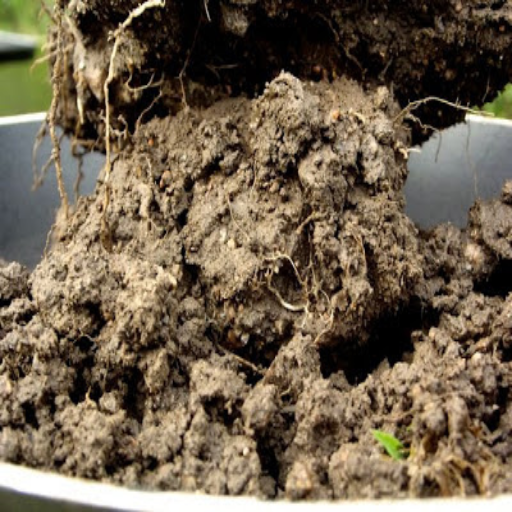

58


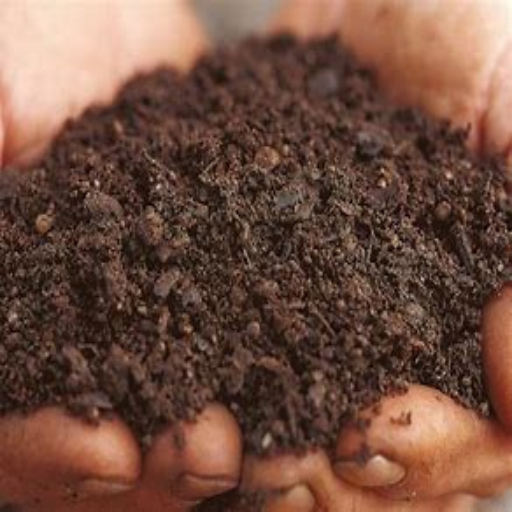

84


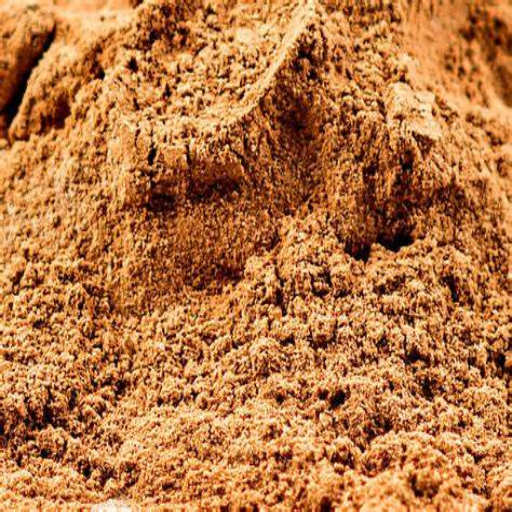

91


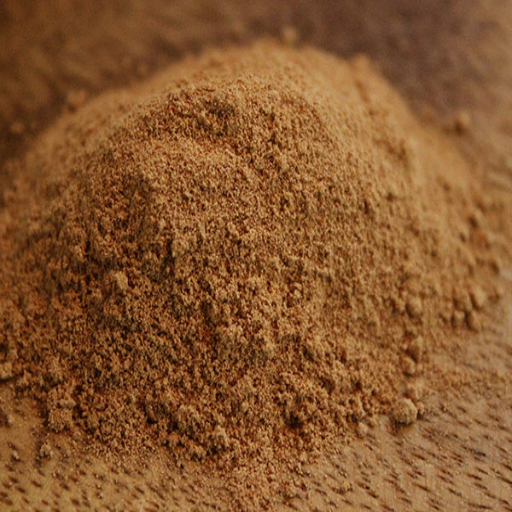

106


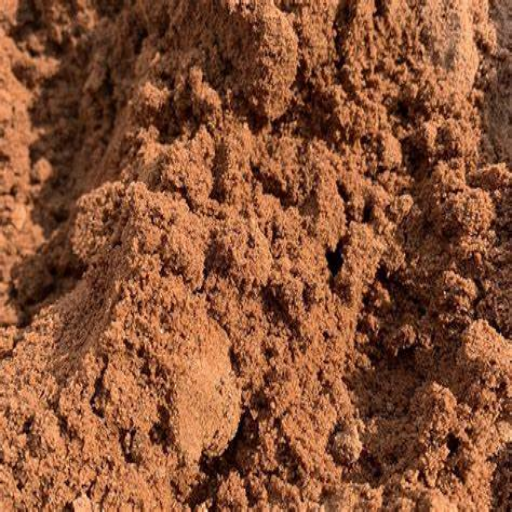

In [6]:
from sklearn.neighbors import NearestNeighbors
import cv2
from google.colab.patches import cv2_imshow

feature_list = np.array(pickle.load(open('/content/embeddings.pkl','rb')))
filenames = pickle.load(open('/content/filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

img = image.load_img('/content/test_image.jpeg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)
# 1070 to 1086
for file in indices[0][0:5]:
    print(file)
    temp_img = cv2.imread(filenames[file])
    cv2_imshow(cv2.resize(temp_img,(512,512)))
    cv2.waitKey(0)

iam thinking that if we can match the indices of the image feature with the feature name we can then pick only two  top recommended images and then if the iamges are in range for example the range of loamy soil images i set is from 1070 to 1086 now if any image from the knn prediction is in this range then we say the soil is good for cotton since we know loamy soil is the best one

## i tried to match the features but it need some further investigation  

In [5]:
for file_index in indices[0][0:2]:
    # Check if the file index is within the specified range
    if 1070 <= file_index <= 1086:
        print("Your soil is perfect for cotton production")
        temp_img = cv2.imread(filenames[file_index])
        cv2.imshow("Image", cv2.resize(temp_img, (512, 512)))
        cv2.waitKey(0)
        # Load and display the image


#if 1070 <= indices[0][0]<=

In [10]:
print(filenames[58])
print(filenames[59])
print(filenames[60])

/content/drive/MyDrive/soils/1070.png
/content/drive/MyDrive/soils/1061.png
/content/drive/MyDrive/soils/1066.png


In [9]:
indices[0][0]

34